## TUGAS AKHIR COURSE:BELAJAR MACHINE LEARNING UNTUK PEMULA

NAMA:A.RAZAQ GALANG TRIANSYAH S.

In [120]:
!pip install split_folders

In [ ]:
import zipfile,os
local_zip = '/content/drive/MyDrive/rps/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/data')
zip_ref.close()



In [ ]:
import splitfolders
splitfolders.ratio('/content/data/rockpaperscissors/rps-cv-images', output ='/content/data/rockpaperscissors/rps-cv-images/split',ratio = (.6,.4) )

Copying files: 2188 files [00:00, 4028.83 files/s]


In [183]:
base_dir = '/content/data/rockpaperscissors/rps-cv-images/split'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [184]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
                    rescale=1./255)

In [185]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=8,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [186]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [187]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 17, 17, 128)      

In [188]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)


In [189]:
from keras.optimizers import Adam
opt = Adam(learning_rate=1e-4)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])


In [190]:
H = model.fit(train_generator,
              validation_data = validation_generator,
              epochs=20,
              steps_per_epoch=25,
              batch_size = 5,
              callbacks=[es])

Epoch 1/20
25/25 [==============================] - 23s 884ms/step - loss: 1.1050 - accuracy: 0.3750 - val_loss: 1.0794 - val_accuracy: 0.5594
Epoch 2/20
25/25 [==============================] - 31s 1s/step - loss: 1.0531 - accuracy: 0.5550 - val_loss: 0.9736 - val_accuracy: 0.6107
Epoch 3/20
25/25 [==============================] - 22s 893ms/step - loss: 0.8633 - accuracy: 0.6400 - val_loss: 0.7663 - val_accuracy: 0.6838
Epoch 4/20
25/25 [==============================] - 33s 1s/step - loss: 0.5672 - accuracy: 0.8050 - val_loss: 0.6264 - val_accuracy: 0.7363
Epoch 5/20
25/25 [==============================] - 22s 894ms/step - loss: 0.6117 - accuracy: 0.7600 - val_loss: 0.5128 - val_accuracy: 0.8299
Epoch 6/20
25/25 [==============================] - 32s 1s/step - loss: 0.3900 - accuracy: 0.8750 - val_loss: 0.3363 - val_accuracy: 0.8836
Epoch 7/20
25/25 [==============================] - 22s 892ms/step - loss: 0.3942 - accuracy: 0.8400 - val_loss: 0.3924 - val_accuracy: 0.8550
Epoch 8/

In [193]:
model.save("my_model.h5", include_optimizer=True)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


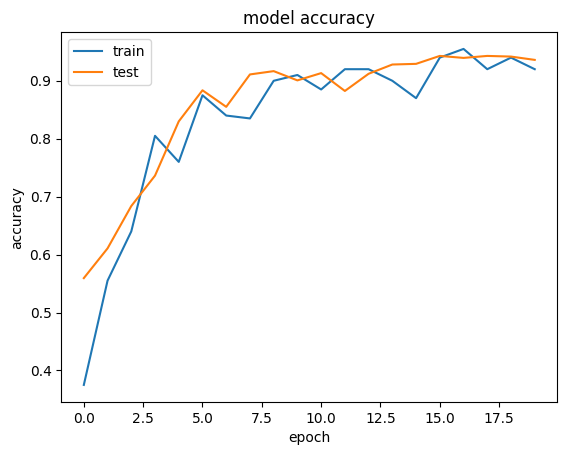

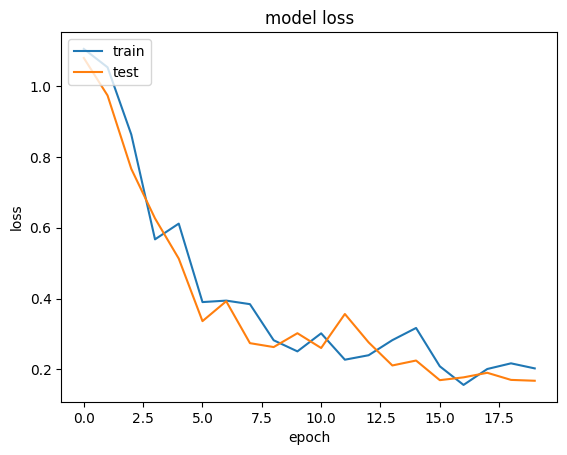

In [204]:
print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving 2DEYFsJ27UgVqv3W.png to 2DEYFsJ27UgVqv3W.png
1/1 [==============================] - 0s 27ms/step
2DEYFsJ27UgVqv3W.png
this is Scissors


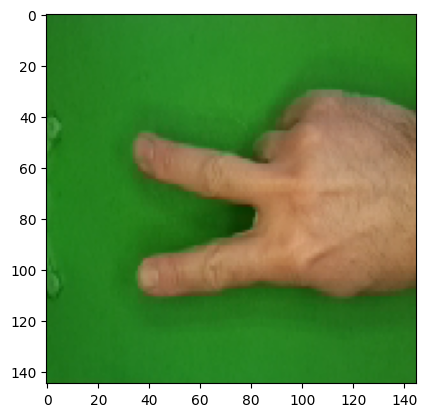

In [203]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
uploaded = files.upload()
for i in uploaded.keys():
  path = i
  img = image.load_img(path, target_size=(145,145))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=5)
  print(i)
  if classes[0,0] == 1.0:
    print('this is Paper')
  elif classes[0,1] == 1.0:
    print('this is Rock')
  else:
    print('this is Scissors')